In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from skimage import io, color, feature, filters, data
from skimage.util import random_noise, compare_images, invert
from skimage.morphology import skeletonize
from skimage.segmentation import watershed
from skimage.feature import peak_local_max, corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse
from skimage.filters import meijering, sato, frangi, hessian

filename = '/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spondylolisthesis Ultralytics Roboflow Training/test/67648d51a49561af42a794147a691e86_jpg.rf.004b082a3ea700d656eb1c53bd8d4a6c.jpg'
image = io.imread(filename)

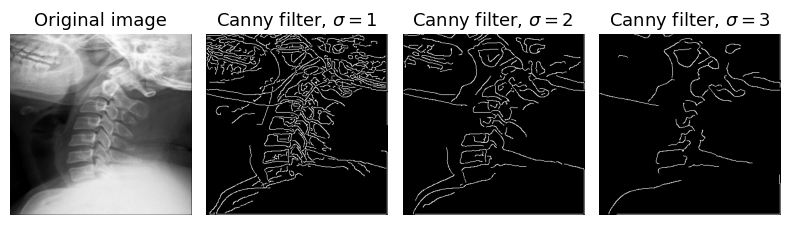

In [23]:
# Edge Detection with Canny Filter
# https://scikit-image.org/docs/0.25.x/auto_examples/edges/plot_canny.html#sphx-glr-auto-examples-edges-plot-canny-python

image2 = image.copy()
image2 = color.rgb2gray(image2)
image2 = ndi.zoom(image2, (0.5, 0.5), order=1)
#image = ndi.rotate(image2, 15, mode='constant')
#image = ndi.gaussian_filter(image2, 4)
#image = random_noise(image2, mode='speckle', mean=0.1)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image2)
edges2 = feature.canny(image2, sigma=2)
edges3 = feature.canny(image2, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 3))

ax[0].imshow(image2, cmap='gray')
ax[0].set_title('Original image', fontsize=13)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=13)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=2$', fontsize=13)

ax[3].imshow(edges3, cmap='gray')
ax[3].set_title(r'Canny filter, $\sigma=3$', fontsize=13)


for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

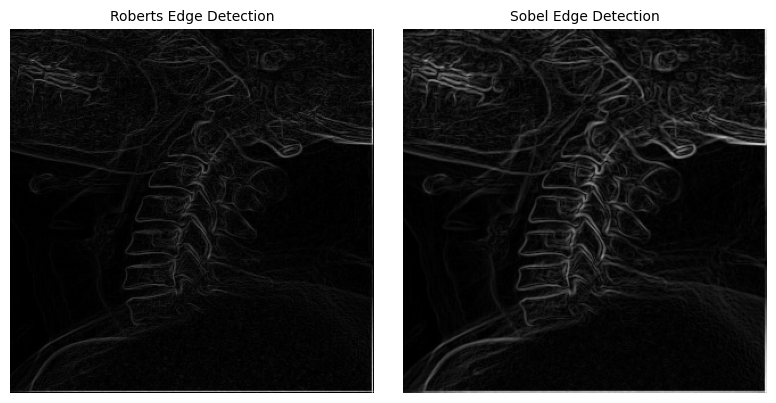

In [24]:
# Edge Operators
# https://scikit-image.org/docs/0.25.x/auto_examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py

image3 = image.copy()
image3 = color.rgb2gray(image3)
image3 = ndi.zoom(image3, (0.5, 0.5), order=1)
edge_roberts = filters.roberts(image3)
edge_sobel = filters.sobel(image3)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

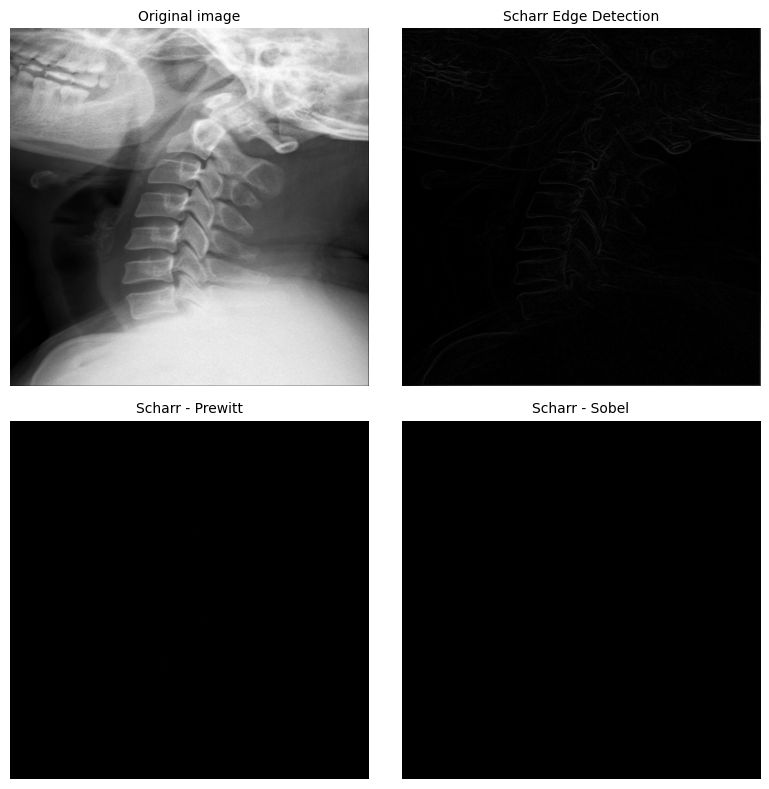

In [25]:
x, y = np.ogrid[:100, :100]

# Creating a rotation-invariant image with different spatial frequencies.
image4 = image.copy()

edge_sobel = filters.sobel(image4)
edge_scharr = filters.scharr(image4)
edge_prewitt = filters.prewitt(image4)

diff_scharr_prewitt = compare_images(edge_scharr, edge_prewitt)
diff_scharr_sobel = compare_images(edge_scharr, edge_sobel)
max_diff = np.max(np.maximum(diff_scharr_prewitt, diff_scharr_sobel))

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 8))
axes = axes.ravel()

axes[0].imshow(image4, cmap=plt.cm.gray)
axes[0].set_title('Original image')

axes[1].imshow(edge_scharr, cmap=plt.cm.gray)
axes[1].set_title('Scharr Edge Detection')

axes[2].imshow(diff_scharr_prewitt, cmap=plt.cm.gray, vmax=max_diff)
axes[2].set_title('Scharr - Prewitt')

axes[3].imshow(diff_scharr_sobel, cmap=plt.cm.gray, vmax=max_diff)
axes[3].set_title('Scharr - Sobel')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..9.88726562305216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..17.919338474945185].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..17.20606998822764].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..20.007007188077193].


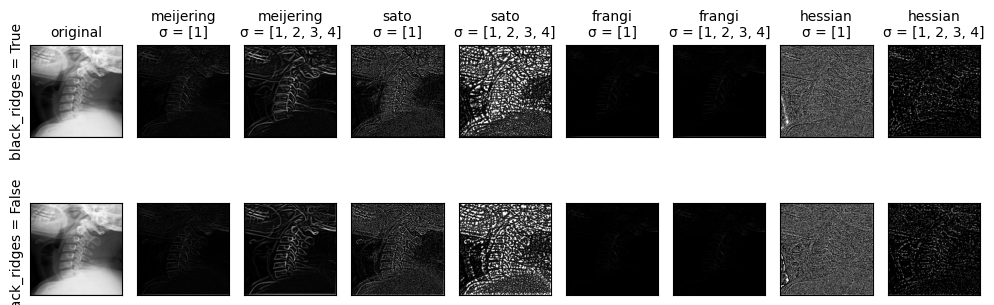

In [26]:
# Ridge Operators
# https://scikit-image.org/docs/0.25.x/auto_examples/edges/plot_ridge_filter.html#sphx-glr-auto-examples-edges-plot-ridge_filter-py

# Ridge filters can be used to detect ridge-like structures, such as neurites, tubes, vessels, wrinkles or rivers.
def original(image, **kwargs):
    """Return the original image, ignoring any kwargs."""
    return image

image6 = image.copy()
image6 = color.rgb2gray(image6)
image6 = ndi.zoom(image6, (0.5, 0.5), order=1)
cmap = plt.cm.gray

plt.rcParams["axes.titlesize"] = "medium"
axes = plt.figure(figsize=(10, 4)).subplots(2, 9)
for i, black_ridges in enumerate([True, False]):
    for j, (func, sigmas) in enumerate(
        [
            (original, None),
            (meijering, [1]),
            (meijering, range(1, 5)),
            (sato, [1]),
            (sato, range(1, 5)),
            (frangi, [1]),
            (frangi, range(1, 5)),
            (hessian, [1]),
            (hessian, range(1, 5)),
        ]
    ):
        result = func(image, black_ridges=black_ridges, sigmas=sigmas)
        axes[i, j].imshow(result, cmap=cmap)
        if i == 0:
            title = func.__name__
            if sigmas:
                title += f"\n\N{GREEK SMALL LETTER SIGMA} = {list(sigmas)}"
            axes[i, j].set_title(title)
        if j == 0:
            axes[i, j].set_ylabel(f'{black_ridges = }')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

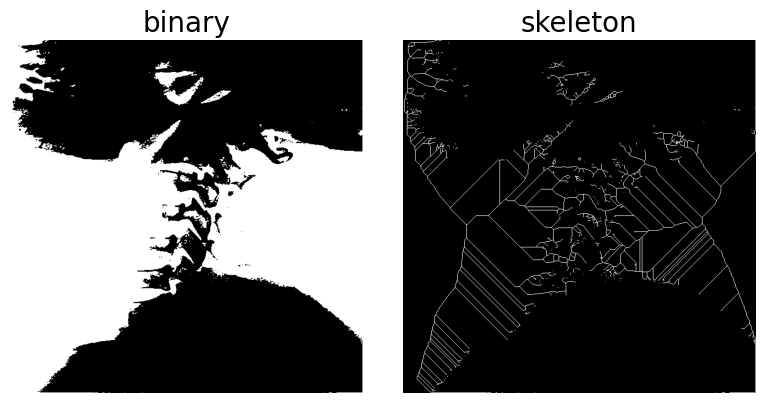

In [27]:
# Skeletonization
# https://scikit-image.org/docs/0.25.x/auto_examples/morphology/plot_skeleton.html#sphx-glr-auto-examples-morphology-plot-skeleton-py
# Skeletonization reduces binary objects to 1 pixel wide representations. 
# This can be useful for feature extraction, and/or representing an object’s topology.
# Skeletonize works by making successive passes of the image. 
# On each pass, border pixels are identified and removed on the condition that they do not break the 
# connectivity of the corresponding object.

from skimage.morphology import skeletonize
from skimage import filters, color
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the image
image7 = image.copy()
image7 = invert(image7)
# Convert to grayscale if the image is RGB
if image7.ndim == 3:
    image7 = color.rgb2gray(image7)

# Convert to binary using Otsu threshold
if image7.max() > 1.0:
    image7 = image7 / image7.max()
thresh = filters.threshold_otsu(image7)
binary = image7 > thresh

# Perform skeletonization
skeleton = skeletonize(binary)

# Display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(binary.astype(float), cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('binary', fontsize=20)
ax[1].imshow(skeleton.astype(float), cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)
fig.tight_layout()
plt.show()

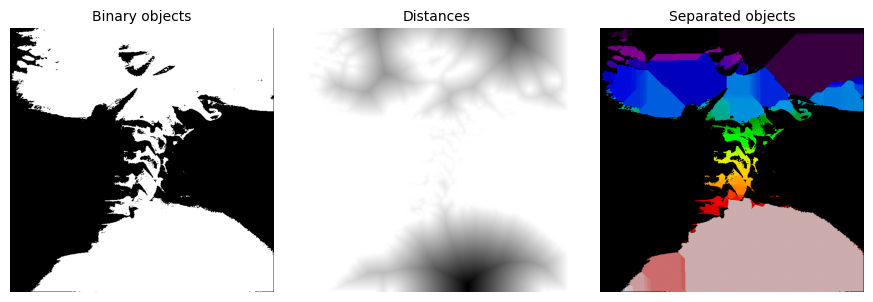

In [28]:
# Watershed algorithm
# https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_watershed.html#sphx-glr-auto-examples-segmentation-plot-watershed-py

image8 = image.copy()
# Convert to grayscale if needed
if image8.ndim == 3:
    image8 = color.rgb2gray(image8)
# Threshold to binary for segmentation
if image8.max() > 1.0:
    image8 = image8 / image8.max()
thresh = filters.threshold_otsu(image8)
binary = image8 > thresh

# Compute the distance transform on the binary image
distance = ndi.distance_transform_edt(binary)
# Find local maxima for markers
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=binary)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=binary)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(binary.astype(float), cmap=plt.cm.gray)
ax[0].set_title('Binary objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, vmin=-distance.max(), vmax=0)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')
for a in ax:
    a.set_axis_off()
fig.tight_layout()
plt.show()

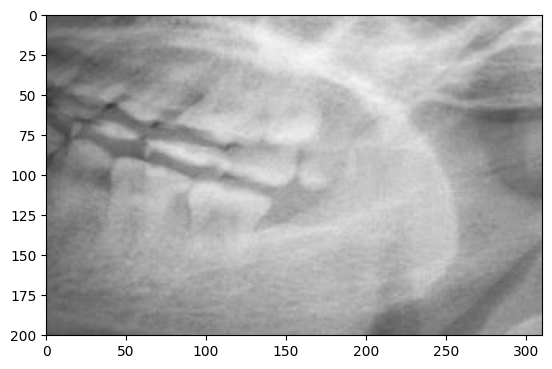

In [29]:
# Corner Harris Detection
# https://scikit-image.org/docs/0.25.x/auto_examples/features_detection/plot_corner_harris.html#sphx-glr-auto-examples-features-detection-plot

image10 = image.copy()
# Convert to grayscale if needed
if image10.ndim == 3:
    image10 = color.rgb2gray(image10)

coords = corner_peaks(corner_harris(image10), min_distance=5, threshold_rel=0.02)
coords_subpix = corner_subpix(image10, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image10, cmap=plt.cm.gray)
ax.plot(
    coords[:, 1], coords[:, 0], color='cyan', marker='o', linestyle='None', markersize=6
)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 310, 200, 0))
plt.show()

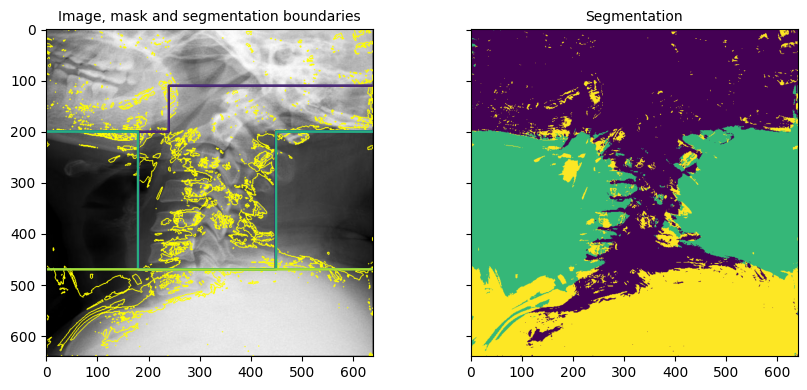

In [30]:
# Trainable segmentation model
# https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_trainable_segmentation.html#sphx-glr-auto-examples-segmentation-plot-trainable-segmentation-py

import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

full_img = image.copy()

img = full_img

# Build an array of labels for training the segmentation.
# Here we use rectangles but visualization libraries such as plotly
# (and napari?) can be used to draw a mask on the image.
training_labels = np.zeros(img.shape[:2], dtype=np.uint8)
training_labels[:110] = 1
training_labels[:200, :240] = 1
training_labels[200:470, 450:950] = 3
training_labels[200:470, 0:180] = 3
training_labels[470:] = 4


sigma_min = 1
sigma_max = 16
features_func = partial(
    feature.multiscale_basic_features,
    intensity=True,
    edges=False,
    texture=True,
    sigma_min=sigma_min,
    sigma_max=sigma_max,
    channel_axis=-1,
)
features = features_func(img)
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=10, max_samples=0.05)
clf = future.fit_segmenter(training_labels, features, clf)
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(img, result, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result)
ax[1].set_title('Segmentation')
fig.tight_layout()

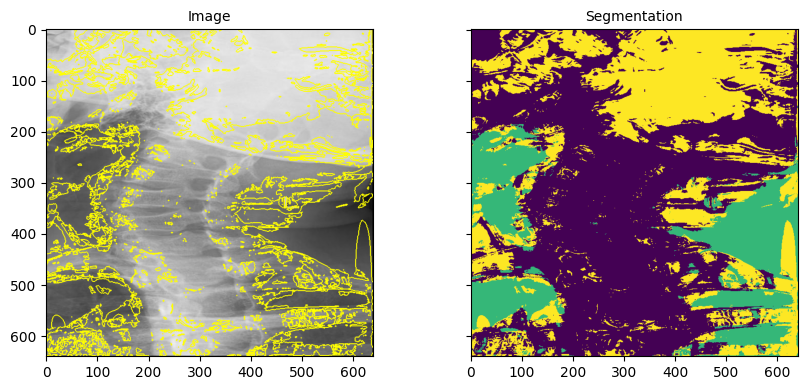

In [31]:
image14 = io.imread('/Users/krishshah/Desktop/Krish_Sky_Long_AI/Spondylolisthesis Ultralytics Roboflow Training/test/56e8db7a304dfd690ae4192236cca51c_jpg.rf.8f0fb32f9a69c71df409d08bda8d6c4e.jpg')

features_new = features_func(image14)
result_new = future.predict_segmenter(features_new, clf)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(image14, result_new, mode='thick'))
ax[0].set_title('Image')
ax[1].imshow(result_new)
ax[1].set_title('Segmentation')
fig.tight_layout()

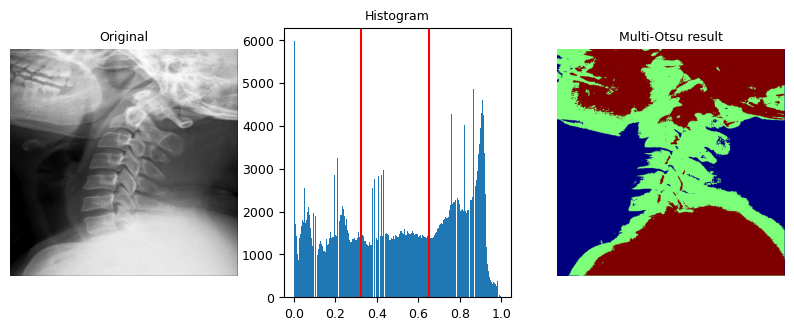

In [32]:
# Multi-Otsu Thresholding
# https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_multiotsu.html
import matplotlib

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image15 = image.copy()
image15 = color.rgb2gray(image15)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image15)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image15, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image15, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image15.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

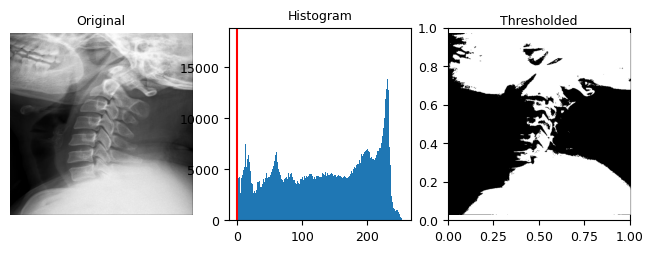

In [33]:
# Thresholding with Otsu's method
# https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_thresholding.html

import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

image16 = image.copy()
image16 = color.rgb2gray(image16)
thresh = threshold_otsu(image16)
binary = image16 > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

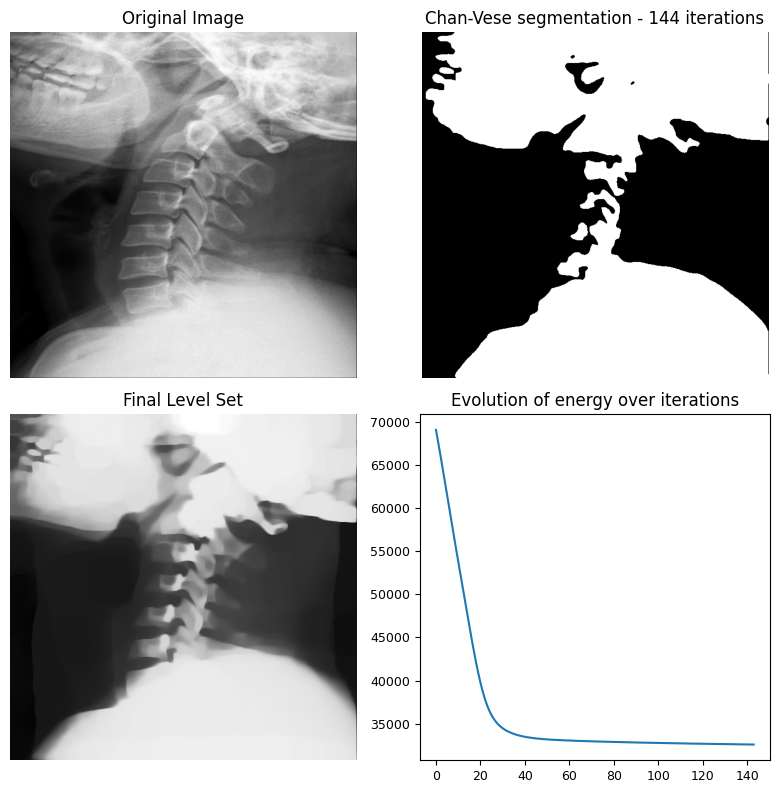

In [34]:
# Chan-Vese Segmentation
# https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_chan_vese.html

import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

image17 = image.copy()
image17 = img_as_float(image17)
# Convert to grayscale if needed
if image17.ndim == 3:
    image17 = color.rgb2gray(image17)
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(
    image17,
    mu=0.25,
    lambda1=1,
    lambda2=1,
    tol=1e-3,
    max_num_iter=200,
    dt=0.5,
    init_level_set="checkerboard",
    extended_output=True,
)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image17, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()